In [2]:
import numpy as no 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import zipfile
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.utils import to_categorical

In [3]:
dataset_path  = "C:/Users/BioHazard/Desktop/resized_dataset"  # Forward slashes work cross-platform

# Automatically generate label mapping from folder names
label_map = {folder_name: idx for idx, folder_name in enumerate(os.listdir(dataset_path)) if os.path.isdir(os.path.join(dataset_path, folder_name))}

# Initialize lists for images and labels
images = []
labels = []

# Parameters for image preprocessing
img_size = (150, 150)  # Resize images to 150x150

# Load images and their corresponding labels
for folder_name, label in label_map.items():
    folder_path = os.path.join(dataset_path, folder_name)
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        try:
            # Load image and preprocess
            img = load_img(file_path, target_size=img_size)
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

# Convert lists to numpy arrays
images = np.array(images, dtype="float32") / 255.0  # Normalize pixel values
labels = np.array(labels)

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Summary of the dataset
print(f"Class labels: {label_map}")
print(f"Total images: {len(images)}")
print(f"Training set: {len(x_train)} images")
print(f"Test set: {len(x_test)} images")


Class labels: {'covid': 0, 'normal': 1, 'PNEUMONIA': 2, 'Tuberculosis': 3}
Total images: 7593
Training set: 6074 images
Test set: 1519 images


In [4]:

class_image_counts = {}
# Count images for each class
for folder_name in label_map.keys():
    folder_path = os.path.join(dataset_path, folder_name)
    if os.path.exists(folder_path):
        # Count the number of files in the folder
        image_count = len([file_name for file_name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file_name))])
        class_image_counts[folder_name] = image_count
    else:
        print(f"Folder not found: {folder_path}")

# Print image counts for each class
print("Image counts per class:")
for class_name, count in class_image_counts.items():
    print(f"{class_name}: {count} images")

Image counts per class:
covid: 1449 images
normal: 3759 images
PNEUMONIA: 1092 images
Tuberculosis: 1293 images


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
num_classes = len(label_map)
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Define a basic CNN model for grayscale MRI images

model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Adjust `num_classes` for your dataset
])


C:\Users\BioHazard\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model_1.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,716 (72.62 MB)

 Trainable params: 19,035,716 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
for layer in model_1.layers:
    if hasattr(layer, 'output'):
        print(f"Layer {layer.name}: {layer.output.shape}")
    else:
        print(f"Layer {layer.name} has no output shape.")

Layer conv2d_3: (None, 148, 148, 32)
Layer max_pooling2d_3: (None, 74, 74, 32)
Layer conv2d_4: (None, 72, 72, 64)
Layer max_pooling2d_4: (None, 36, 36, 64)
Layer conv2d_5: (None, 34, 34, 128)
Layer max_pooling2d_5: (None, 17, 17, 128)
Layer flatten_1: (None, 36992)
Layer dense_2: (None, 512)
Layer dropout: (None, 512)
Layer dense_3: (None, 4)


In [21]:
# Compile the model
model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
history = model_1.fit(
    x_train, y_train_one_hot,
    epochs=10,
    batch_size=16,
    validation_data=(x_test, y_test_one_hot)
)


Epoch 1/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 162s 412ms/step - accuracy: 0.7499 - loss: 0.7140 - val_accuracy: 0.8749 - val_loss: 0.3463
Epoch 2/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 155s 409ms/step - accuracy: 0.8938 - loss: 0.3113 - val_accuracy: 0.9190 - val_loss: 0.2409
Epoch 3/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 153s 402ms/step - accuracy: 0.9340 - loss: 0.2023 - val_accuracy: 0.9302 - val_loss: 0.1976
Epoch 4/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 150s 394ms/step - accuracy: 0.9507 - loss: 0.1423 - val_accuracy: 0.9480 - val_loss: 0.1743
Epoch 5/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 199s 387ms/step - accuracy: 0.9620 - loss: 0.1119 - val_accuracy: 0.9519 - val_loss: 0.1556
Epoch 6/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 147s 388ms/step - accuracy: 0.9741 - loss: 0.0808 - val_accuracy: 0.9375 - val_loss: 0.1951
Epoch 7/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 204s 393ms/step - accuracy: 0.9728 - loss: 0.0760 - val_accuracy: 0.9408 - val_loss: 0.2055
Epoch 8/10
380/380 ━━━━━━━━━━━━━━━━━━━━ 150s 395ms/step - accuracy: 0.9770 -

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming y_true and y_pred are your true labels and predicted labels

# If you're using one-hot encoding for labels, you may need to convert them back
y_true = np.argmax(y_test_one_hot, axis=1)  # Convert one-hot to class labels
y_pred = np.argmax(model_1.predict(x_test), axis=1)  # Get class predictions

# Get the classification report
report = classification_report(y_true, y_pred)
print(report)

13/48 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step

In [162]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
#overfitting model

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9601 - loss: 0.1827
Test Accuracy: 95.00%


# Fine tuning 

In [164]:
conv_base_vgg = VGG16(weights='imagenet',
                      include_top=False,
                      input_shape=(150, 150, 3))

In [166]:
# Congeler toutes les couches du modèle pré-entraîné
conv_base_vgg.trainable = False

# Décongeler les dernières couches pour le fine-tuning
for layer in conv_base_vgg.layers[-4:]:
    layer.trainable = True

print("Couches entraînables dans VGG16:")
for layer in conv_base_vgg.layers:
    print(f"{layer.name}: {'Entraînable' if layer.trainable else 'Non entraînable'}")

Couches entraînables dans VGG16:
input_layer_13: Non entraînable
block1_conv1: Non entraînable
block1_conv2: Non entraînable
block1_pool: Non entraînable
block2_conv1: Non entraînable
block2_conv2: Non entraînable
block2_pool: Non entraînable
block3_conv1: Non entraînable
block3_conv2: Non entraînable
block3_conv3: Non entraînable
block3_pool: Non entraînable
block4_conv1: Non entraînable
block4_conv2: Non entraînable
block4_conv3: Non entraînable
block4_pool: Non entraînable
block5_conv1: Entraînable
block5_conv2: Entraînable
block5_conv3: Entraînable
block5_pool: Entraînable


In [168]:
model_vgg = models.Sequential()
model_vgg.add(conv_base_vgg)
model_vgg.add(layers.Flatten())
model_vgg.add(layers.Dense(512, activation='relu'))
model_vgg.add(layers.Dropout(0.5))
model_vgg.add(layers.Dense(4, activation='sigmoid'))

In [170]:
from tensorflow.keras.callbacks import EarlyStopping

# Définir le callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Surveiller la validation accuracy
    patience=2,              # Arrêter après 2 époques sans amélioration
    restore_best_weights=True  # Restaurer les poids du meilleur modèle
)

# Compilation du modèle
model_vgg.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [172]:
history_vgg = model_vgg.fit(
    x_train, y_train_one_hot,  # Correct variable names
    epochs=15,
    batch_size=32,
    validation_data=(x_test, y_test_one_hot),  # Correct validation data
    callbacks=[early_stopping]  # Add the callback
)



Epoch 1/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.6999 - loss: 0.7598 - val_accuracy: 0.9513 - val_loss: 0.1759
Epoch 2/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 188s 991ms/step - accuracy: 0.9385 - loss: 0.1939 - val_accuracy: 0.9684 - val_loss: 0.1195
Epoch 3/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 187s 984ms/step - accuracy: 0.9660 - loss: 0.1110 - val_accuracy: 0.9783 - val_loss: 0.0817
Epoch 4/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 187s 983ms/step - accuracy: 0.9742 - loss: 0.0729 - val_accuracy: 0.9796 - val_loss: 0.0687
Epoch 5/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 188s 991ms/step - accuracy: 0.9812 - loss: 0.0536 - val_accuracy: 0.9789 - val_loss: 0.0706
Epoch 6/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 187s 982ms/step - accuracy: 0.9860 - loss: 0.0504 - val_accuracy: 0.9789 - val_loss: 0.0604


In [174]:
y_pred = model_vgg.predict(x_test).squeeze()

48/48 ━━━━━━━━━━━━━━━━━━━━ 31s 640ms/step


In [176]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_classes = y_pred.argmax(axis=1)  # For multi-class classification, get the class with the highest probability

# Generate the confusion matrix
print(list(set(y_pred_classes)))

[0, 1, 2, 3]


In [178]:
list(set(y_test_one_hot.argmax(axis =1)))

[0, 1, 2, 3]

In [182]:
cm = confusion_matrix(y_test_one_hot.argmax(axis =1), y_pred_classes)



    # Affichage du rapport de classification
print(classification_report(y_test_one_hot.argmax(axis =1), y_pred_classes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       310
           1       0.98      0.99      0.98       739
           2       0.98      0.98      0.98       214
           3       0.99      0.97      0.98       256

    accuracy                           0.98      1519
   macro avg       0.98      0.98      0.98      1519
weighted avg       0.98      0.98      0.98      1519



In [184]:
model_vgg.save("Vgg16good.h5")

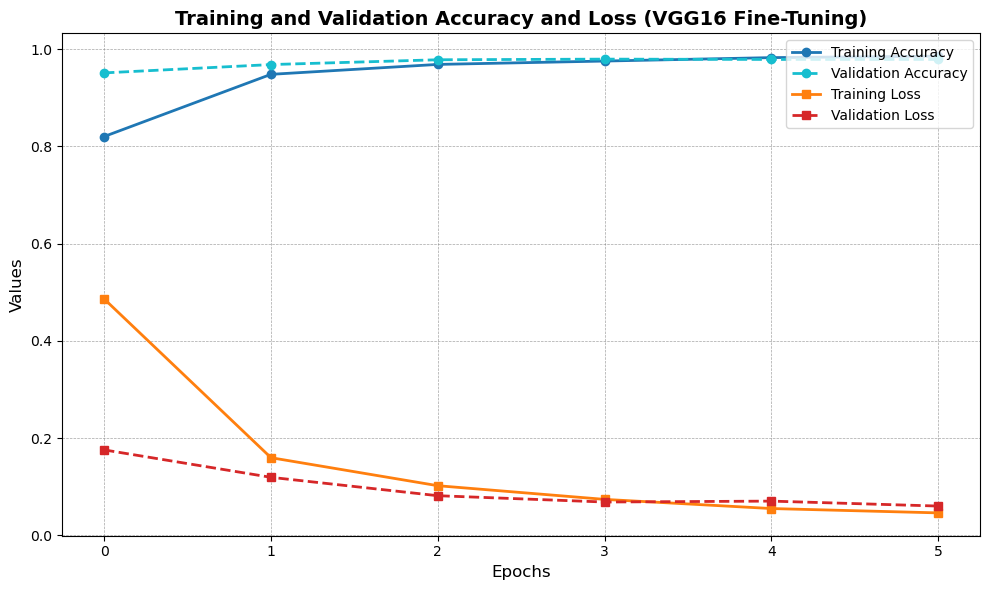

In [186]:
import matplotlib.pyplot as plt

acc_vgg = history_vgg.history['accuracy']
val_acc_vgg = history_vgg.history['val_accuracy']
loss_vgg = history_vgg.history['loss']
val_loss_vgg = history_vgg.history['val_loss']
epochs = range(len(acc_vgg))

plt.figure(figsize=(10, 6))

# Accuracy plots
plt.plot(epochs, acc_vgg, color="#1f77b4", marker='o', linestyle='-', linewidth=2, label='Training Accuracy')
plt.plot(epochs, val_acc_vgg, color="#17becf", marker='o', linestyle='--', linewidth=2, label='Validation Accuracy')

# Loss plots
plt.plot(epochs, loss_vgg, color="#ff7f0e", marker='s', linestyle='-', linewidth=2, label='Training Loss')
plt.plot(epochs, val_loss_vgg, color="#d62728", marker='s', linestyle='--', linewidth=2, label='Validation Loss')

# Titles and labels
plt.title('Training and Validation Accuracy and Loss (VGG16 Fine-Tuning)', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Grid and legend
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper right', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


# efficcient net

In [9]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
# Load EfficientNetB0 with pre-trained weights, excluding the top layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling
x = Dense(1028, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout layer with 50% dropout rate
x = Dense(1028, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout layer with 50% dropout rate
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer

# Combine the base model and the custom layers
model_efficientnet = Model(inputs=base_model.input, outputs=predictions)


In [13]:
# Freeze the base model layers (optional, for transfer learning)
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Define early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Train the model
history = model.fit(
    x_train, y_train_one_hot,  # Training data
    epochs=15,  # Number of epochs
    batch_size=32,  # Batch size
    validation_data=(x_test, y_test_one_hot),  # Validation data
    callbacks=[early_stopping]  # Early stopping callback
)

Epoch 1/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 75s 384ms/step - accuracy: 0.6970 - loss: 0.7758 - val_accuracy: 0.8802 - val_loss: 0.3324
Epoch 2/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 63s 332ms/step - accuracy: 0.9052 - loss: 0.2842 - val_accuracy: 0.8927 - val_loss: 0.3145
Epoch 3/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 59s 311ms/step - accuracy: 0.9184 - loss: 0.2464 - val_accuracy: 0.9223 - val_loss: 0.2386
Epoch 4/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 59s 313ms/step - accuracy: 0.9429 - loss: 0.1764 - val_accuracy: 0.9263 - val_loss: 0.2162
Epoch 5/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 58s 306ms/step - accuracy: 0.9503 - loss: 0.1533 - val_accuracy: 0.9414 - val_loss: 0.1816
Epoch 6/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 58s 307ms/step - accuracy: 0.9589 - loss: 0.1315 - val_accuracy: 0.9427 - val_loss: 0.1648
Epoch 7/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 58s 306ms/step - accuracy: 0.9713 - loss: 0.0883 - val_accuracy: 0.9440 - val_loss: 0.1600
Epoch 8/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 59s 309ms/step - accuracy: 0.9722 - loss: 0

In [17]:
loss, accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9633 - loss: 0.1076
Test Loss: 0.13438937067985535
Test Accuracy: 0.9552336931228638


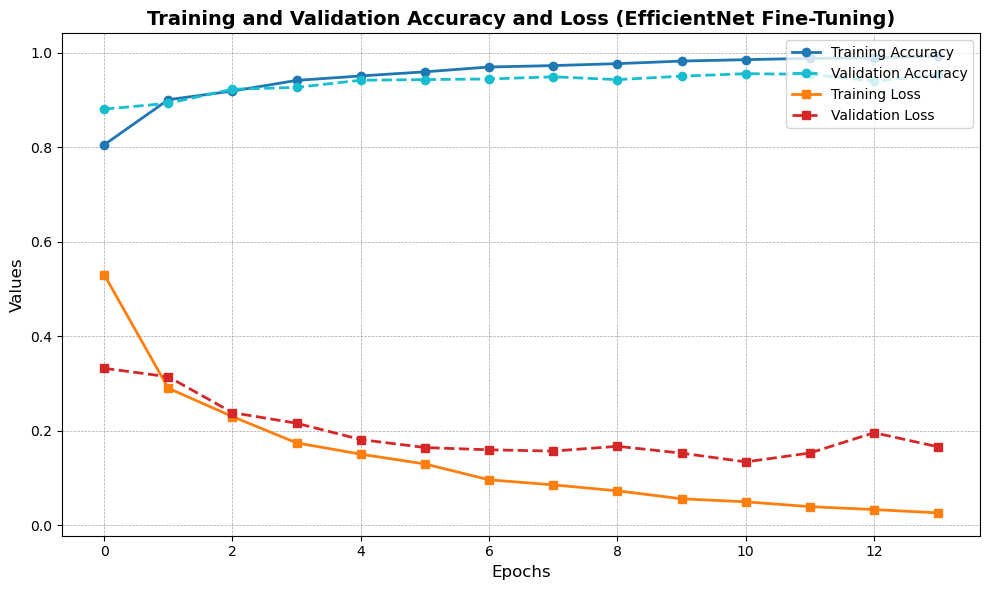

In [18]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from EfficientNet training history
acc_efficientnet = history.history['accuracy']
val_acc_efficientnet = history.history['val_accuracy']
loss_efficientnet = history.history['loss']
val_loss_efficientnet = history.history['val_loss']
epochs = range(len(acc_efficientnet))

# Create the plot
plt.figure(figsize=(10, 6))

# Accuracy plots
plt.plot(epochs, acc_efficientnet, color="#1f77b4", marker='o', linestyle='-', linewidth=2, label='Training Accuracy')
plt.plot(epochs, val_acc_efficientnet, color="#17becf", marker='o', linestyle='--', linewidth=2, label='Validation Accuracy')

# Loss plots
plt.plot(epochs, loss_efficientnet, color="#ff7f0e", marker='s', linestyle='-', linewidth=2, label='Training Loss')
plt.plot(epochs, val_loss_efficientnet, color="#d62728", marker='s', linestyle='--', linewidth=2, label='Validation Loss')

# Titles and labels
plt.title('Training and Validation Accuracy and Loss (EfficientNet Fine-Tuning)', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Grid and legend
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper right', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step


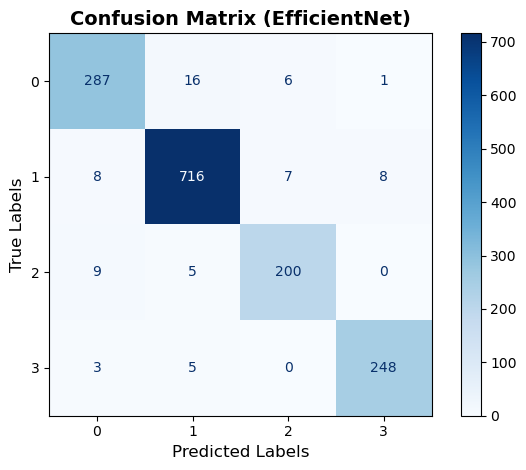

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the test data
y_pred = model.predict(x_test)  # Get predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Convert one-hot encoded y_test to class labels
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(num_classes))
disp.plot(cmap=plt.cm.Blues, values_format='d')  # Use 'd' for integer formatting

# Add title and labels
plt.title('Confusion Matrix (EfficientNet)', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Flatten, Dense, BatchNormalization, Dropout

# Define the number of classes
num_classes = 4  # Replace with the number of classes in your dataset

# Define a basic CNN model for grayscale MRI images
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # Input shape for grayscale images
    BatchNormalization(),  # Batch Normalization
    Dropout(0.25),# Dropout with 25% dropout rate

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),  # Batch Normalization
    Dropout(0.25),  # Dropout with 25% dropout rate

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),  # Batch Normalization
    Dropout(0.25),  # Dropout with 25% dropout rate

    # Global Average Pooling
    GlobalAveragePooling2D(),  # Replace MaxPooling with Global Average Pooling

    # Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),  # Batch Normalization
    Dropout(0.5),  # Dropout with 50% dropout rate
    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 146, 146, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 146, 146, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 144, 144, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 144, 144, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 144, 144, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,292 (641.77 KB)

 Trainable params: 162,820 (636.02 KB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Train the model
history = model.fit(
    x_train, y_train_one_hot,  # Training data
    epochs=15,  # Number of epochs
    batch_size=32,  # Batch size
    validation_data=(x_test, y_test_one_hot),  # Validation data
    callbacks=[early_stopping]  # Early stopping callback
)

Epoch 1/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 833s 4s/step - accuracy: 0.5821 - loss: 1.2520 - val_accuracy: 0.4865 - val_loss: 1.2923
Epoch 2/15
190/190 ━━━━━━━━━━━━━━━━━━━━ 832s 4s/step - accuracy: 0.7504 - loss: 0.7152 - val_accuracy: 0.3601 - val_loss: 1.7091
Epoch 3/15
  2/190 ━━━━━━━━━━━━━━━━━━━━ 14:06 5s/step - accuracy: 0.8125 - loss: 0.3975

# alex

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the number of classes
num_classes = 4  # Replace with the number of classes in your dataset

# Define the input shape (e.g., 227x227 grayscale images)
input_shape = (150, 150, 3)  # Change to (227, 227, 3) for RGB images

# Build the AlexNet model
model_alex = Sequential([
    # Convolutional Layer 1
    Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape),
    MaxPooling2D((3, 3), strides=(2, 2)),

    # Convolutional Layer 2
    Conv2D(256, (5, 5), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=(2, 2)),

    # Convolutional Layer 3
    Conv2D(384, (3, 3), padding='same', activation='relu'),

    # Convolutional Layer 4
    Conv2D(384, (3, 3), padding='same', activation='relu'),

    # Convolutional Layer 5
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=(2, 2)),

    # Flatten the output
    Flatten(),

    # Fully Connected Layer 1
    Dense(4096, activation='relu'),
    Dropout(0.5),  # Dropout for regularization

    # Fully Connected Layer 2
    Dense(4096, activation='relu'),
    Dropout(0.5),  # Dropout for regularization

    # Output Layer
    Dense(num_classes, activation='softmax')
])

# Compile the model
model_alex.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model_alex.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 35, 35, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 17, 17, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 17, 17, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4096)           │     9,441,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │        16,388 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,986,180 (114.39 MB)

 Trainable params: 29,986,180 (114.39 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Train the model
history = model_alex.fit(
    x_train, y_train_one_hot,  # Training data
    epochs=15,  # Number of epochs
    batch_size=16,  # Batch size
    validation_data=(x_test, y_test_one_hot),  # Validation data
    callbacks=[early_stopping]  # Early stopping callback
)

Epoch 1/15
380/380 ━━━━━━━━━━━━━━━━━━━━ 185s 465ms/step - accuracy: 0.6309 - loss: 0.9198 - val_accuracy: 0.8828 - val_loss: 0.3498
Epoch 2/15
380/380 ━━━━━━━━━━━━━━━━━━━━ 173s 455ms/step - accuracy: 0.8734 - loss: 0.3568 - val_accuracy: 0.9151 - val_loss: 0.2461
Epoch 3/15
380/380 ━━━━━━━━━━━━━━━━━━━━ 171s 450ms/step - accuracy: 0.9180 - loss: 0.2383 - val_accuracy: 0.9302 - val_loss: 0.2028
Epoch 4/15
380/380 ━━━━━━━━━━━━━━━━━━━━ 203s 451ms/step - accuracy: 0.9342 - loss: 0.1895 - val_accuracy: 0.9447 - val_loss: 0.1813
Epoch 5/15
380/380 ━━━━━━━━━━━━━━━━━━━━ 171s 449ms/step - accuracy: 0.9497 - loss: 0.1489 - val_accuracy: 0.9263 - val_loss: 0.2239
Epoch 6/15
380/380 ━━━━━━━━━━━━━━━━━━━━ 178s 469ms/step - accuracy: 0.9525 - loss: 0.1390 - val_accuracy: 0.9473 - val_loss: 0.1699
Epoch 7/15
380/380 ━━━━━━━━━━━━━━━━━━━━ 175s 460ms/step - accuracy: 0.9604 - loss: 0.1184 - val_accuracy: 0.9315 - val_loss: 0.1951
Epoch 8/15
380/380 ━━━━━━━━━━━━━━━━━━━━ 175s 460ms/step - accuracy: 0.9626 -

In [15]:
loss, accuracy = model_alex.evaluate(x_test, y_test_one_hot)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.9689 - loss: 0.0899
Test Loss: 0.10676678270101547
Test Accuracy: 0.9677419066429138


48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step


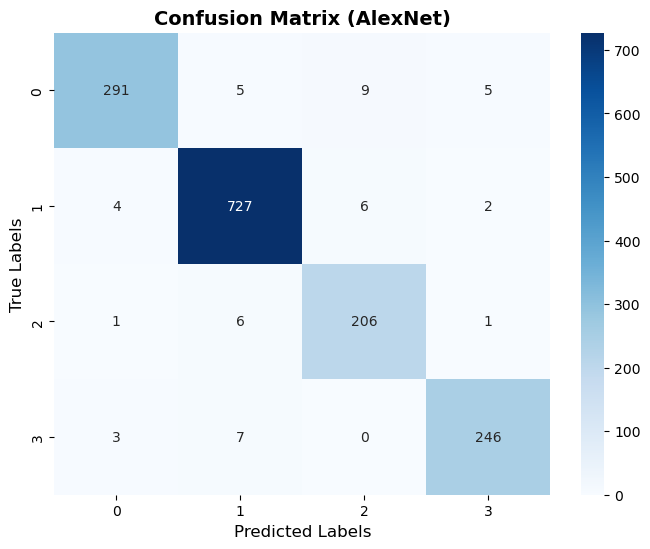


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       310
           1       0.98      0.98      0.98       739
           2       0.93      0.96      0.95       214
           3       0.97      0.96      0.96       256

    accuracy                           0.97      1519
   macro avg       0.96      0.96      0.96      1519
weighted avg       0.97      0.97      0.97      1519



In [17]:
# Predict the test data
y_pred = model_alex.predict(x_test)  # Get predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Convert one-hot encoded y_test to class labels
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Generate the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.title('Confusion Matrix (AlexNet)', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))

In [19]:
model_alex.save("alex.h5")

# Inception

In [21]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of classes
num_classes = 4  # Replace with the number of classes in your dataset

# Define the input shape (e.g., 299x299 RGB images)
input_shape = (150, 150, 3)  # InceptionV3 expects 299x299 images

# Load InceptionV3 with pre-trained weights, excluding the top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling
x = Dense(512, activation='relu')(x)  # Fully connected layer
x = Dropout(0.25)(x)  # Dropout for regularization
x = Dense(1024, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer

# Combine the base model and the custom layers
model_inception = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers (optional, for transfer learning)
for layer in base_model.layers[:-15]:
    layer.trainable = True

# Compile the model
model_inception.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
#model.summary()





In [23]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Train the model
history = model_inception.fit(
    x_train, y_train_one_hot,  # Training data
    epochs=15,  # Number of epochs
    batch_size=8,  # Batch size
    validation_data=(x_test, y_test_one_hot),  # Validation data
    callbacks=[early_stopping]  # Early stopping callback
)

Epoch 1/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 626s 699ms/step - accuracy: 0.7775 - loss: 0.5734 - val_accuracy: 0.9664 - val_loss: 0.1218
Epoch 2/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 585s 730ms/step - accuracy: 0.9496 - loss: 0.1616 - val_accuracy: 0.9631 - val_loss: 0.1039
Epoch 3/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 555s 721ms/step - accuracy: 0.9675 - loss: 0.1112 - val_accuracy: 0.9697 - val_loss: 0.0753
Epoch 4/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 544s 715ms/step - accuracy: 0.9782 - loss: 0.0753 - val_accuracy: 0.9803 - val_loss: 0.0625
Epoch 5/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 536s 705ms/step - accuracy: 0.9782 - loss: 0.0712 - val_accuracy: 0.9796 - val_loss: 0.0569
Epoch 6/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 548s 721ms/step - accuracy: 0.9864 - loss: 0.0558 - val_accuracy: 0.9546 - val_loss: 0.1361
Epoch 7/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 558s 715ms/step - accuracy: 0.9806 - loss: 0.0610 - val_accuracy: 0.9855 - val_loss: 0.0557
Epoch 8/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 530s 697ms/step - accuracy: 0.9883 -

In [28]:
# Evaluate the model on the test data
loss, accuracy = model_inception.evaluate(x_test, y_test_one_hot)

# Print the test loss and accuracy as percentages
print(f"Test Loss: {loss * 100:.2f}%")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

48/48 ━━━━━━━━━━━━━━━━━━━━ 26s 547ms/step - accuracy: 0.9891 - loss: 0.0441
Test Loss: 5.57%
Test Accuracy: 98.55%


In [30]:
# Predict the test data
y_pred = model_inception.predict(x_test)  # Get predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Convert one-hot encoded y_test to class labels
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Generate the confusion matrix
cm_inception = confusion_matrix(y_true_classes, y_pred_classes)



48/48 ━━━━━━━━━━━━━━━━━━━━ 39s 679ms/step


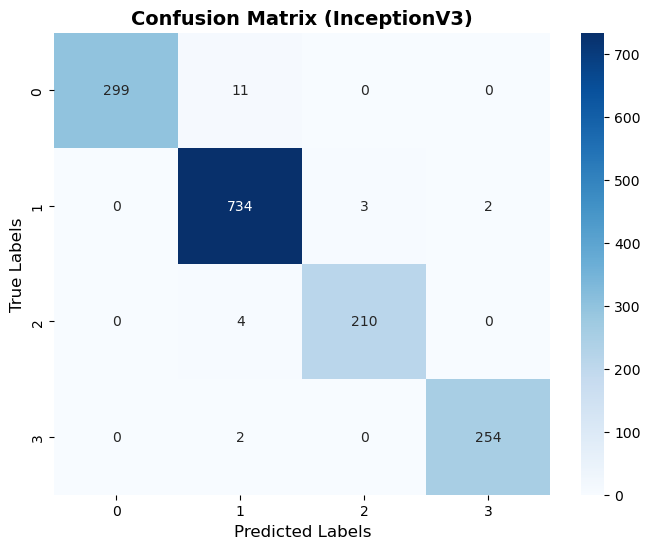


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       310
           1       0.98      0.99      0.99       739
           2       0.99      0.98      0.98       214
           3       0.99      0.99      0.99       256

    accuracy                           0.99      1519
   macro avg       0.99      0.98      0.99      1519
weighted avg       0.99      0.99      0.99      1519



In [32]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_inception, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.title('Confusion Matrix (InceptionV3)', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))

In [34]:
model_inception.save("inception.h5")

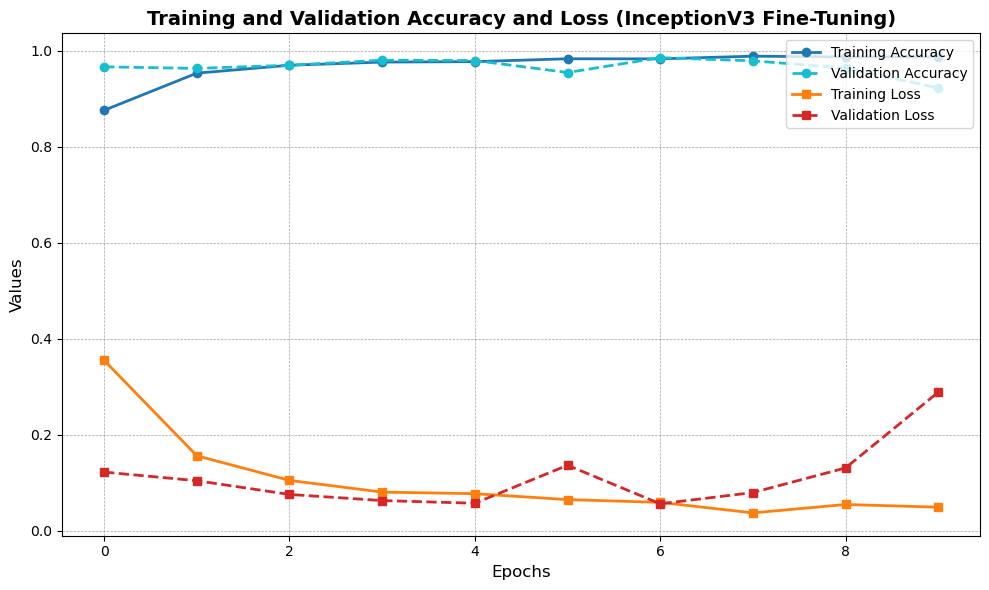

In [36]:
# Plot training and validation accuracy and loss
import matplotlib.pyplot as plt

acc_inception = history.history['accuracy']
val_acc_inception = history.history['val_accuracy']
loss_inception = history.history['loss']
val_loss_inception = history.history['val_loss']
epochs = range(len(acc_inception))

plt.figure(figsize=(10, 6))

# Accuracy plots
plt.plot(epochs, acc_inception, color="#1f77b4", marker='o', linestyle='-', linewidth=2, label='Training Accuracy')
plt.plot(epochs, val_acc_inception, color="#17becf", marker='o', linestyle='--', linewidth=2, label='Validation Accuracy')

# Loss plots
plt.plot(epochs, loss_inception, color="#ff7f0e", marker='s', linestyle='-', linewidth=2, label='Training Loss')
plt.plot(epochs, val_loss_inception, color="#d62728", marker='s', linestyle='--', linewidth=2, label='Validation Loss')

# Titles and labels
plt.title('Training and Validation Accuracy and Loss (InceptionV3 Fine-Tuning)', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Grid and legend
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper right', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

# XCeption

In [14]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import numpy as np

# Define the number of classes
num_classes = 4  # Replace with the number of classes in your dataset

# Define the input shape (e.g., 150x150 RGB images)
input_shape = (150, 150, 3)

# Load Xception with pre-trained weights, excluding the top layers
base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling
x = Dense(1024, activation='relu')(x)  # Fully connected layer
x = Dropout(0.75)(x)  # Dropout for regularization
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer

# Combine the base model and the custom layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers (optional, for transfer learning)
for layer in base_model.layers[:-5]:
    layer.trainable = True

# Compile the model with RMSprop optimizer
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
#model.summary()

# Assuming you have your data ready (x_train, y_train_one_hot, x_test, y_test_one_hot)
# Normalize input data to [0, 1]
#x_train = x_train.astype('float32') / 255.0
#x_test = x_test.astype('float32') / 255.0



In [16]:
# Define Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement after which training will stop
    restore_best_weights=True  # Restore the best weights when training stops
)

# Train the model with Early Stopping
history = model.fit(
    x_train, y_train_one_hot,
    epochs=50,  # Maximum number of epochs (training will stop earlier due to early stopping)
    batch_size=32,  # Batch size
    validation_data=(x_test, y_test_one_hot),
    callbacks=[early_stopping]  # Add Early Stopping callback
)



Epoch 1/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1019s 5s/step - accuracy: 0.7636 - loss: 0.5951 - val_accuracy: 0.9750 - val_loss: 0.0839
Epoch 2/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 953s 5s/step - accuracy: 0.9888 - loss: 0.0468 - val_accuracy: 0.9849 - val_loss: 0.0482
Epoch 3/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 952s 5s/step - accuracy: 0.9938 - loss: 0.0205 - val_accuracy: 0.9842 - val_loss: 0.0731
Epoch 4/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1005s 5s/step - accuracy: 0.9941 - loss: 0.0169 - val_accuracy: 0.9849 - val_loss: 0.0639
Epoch 5/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 964s 5s/step - accuracy: 0.9948 - loss: 0.0178 - val_accuracy: 0.9789 - val_loss: 0.0929
Epoch 6/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 935s 5s/step - accuracy: 0.9990 - loss: 0.0036 - val_accuracy: 0.9934 - val_loss: 0.0403
Epoch 7/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 931s 5s/step - accuracy: 0.9982 - loss: 0.0083 - val_accuracy: 0.9882 - val_loss: 0.0557
Epoch 8/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 965s 5s/step - accuracy: 0.9962 - loss: 0.0124 - val_ac

In [18]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test_one_hot)

# Print the test loss and accuracy
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

48/48 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9943 - loss: 0.0196
Test Loss: 0.0403
Test Accuracy: 99.34%


In [22]:

from sklearn.metrics import confusion_matrix, classification_report
# Predict the test data
y_pred = model.predict(x_test)  # Get predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Convert one-hot encoded y_test to class labels
y_true_classes = np.argmax(y_test_one_hot, axis=1)

# Generate the confusion matrix
cm_xception = confusion_matrix(y_true_classes, y_pred_classes)



48/48 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step


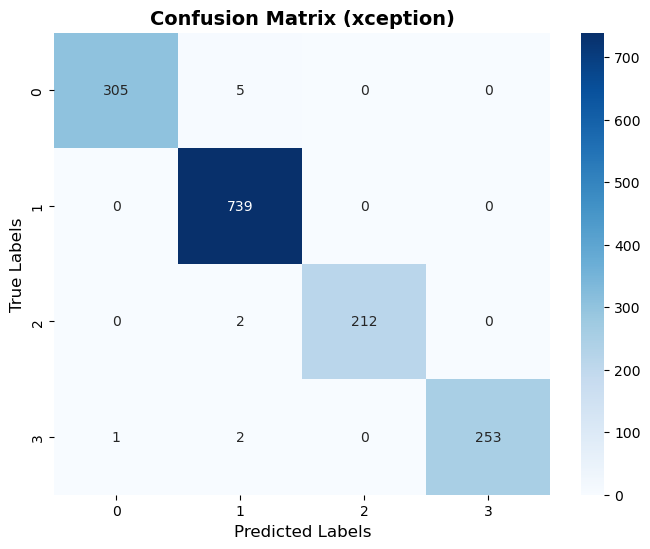


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       310
           1       0.99      1.00      0.99       739
           2       1.00      0.99      1.00       214
           3       1.00      0.99      0.99       256

    accuracy                           0.99      1519
   macro avg       1.00      0.99      0.99      1519
weighted avg       0.99      0.99      0.99      1519



In [30]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xception, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.title('Confusion Matrix (xception)', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))

In [28]:
model.save("xception_beast.h5")

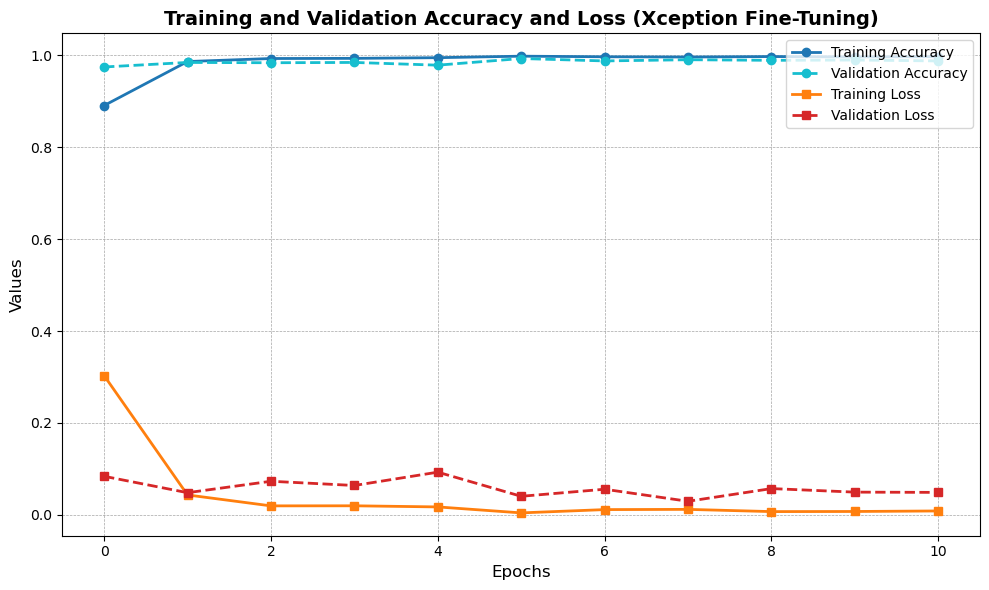

In [32]:
# Plot training and validation accuracy and loss
import matplotlib.pyplot as plt

acc_xception = history.history['accuracy']
val_acc_xception = history.history['val_accuracy']
loss_xception = history.history['loss']
val_loss_xception = history.history['val_loss']
epochs = range(len(acc_xception))

plt.figure(figsize=(10, 6))

# Accuracy plots
plt.plot(epochs, acc_xception, color="#1f77b4", marker='o', linestyle='-', linewidth=2, label='Training Accuracy')
plt.plot(epochs, val_acc_xception, color="#17becf", marker='o', linestyle='--', linewidth=2, label='Validation Accuracy')

# Loss plots
plt.plot(epochs, loss_xception, color="#ff7f0e", marker='s', linestyle='-', linewidth=2, label='Training Loss')
plt.plot(epochs, val_loss_xception, color="#d62728", marker='s', linestyle='--', linewidth=2, label='Validation Loss')

# Titles and labels
plt.title('Training and Validation Accuracy and Loss (Xception Fine-Tuning)', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Grid and legend
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper right', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


# comparing the saved models

Model 1 Accuracy: 96.77%
Model 2 Accuracy: 98.55%
Model 3 Accuracy: 97.96%
Model 4 Accuracy: 99.34%


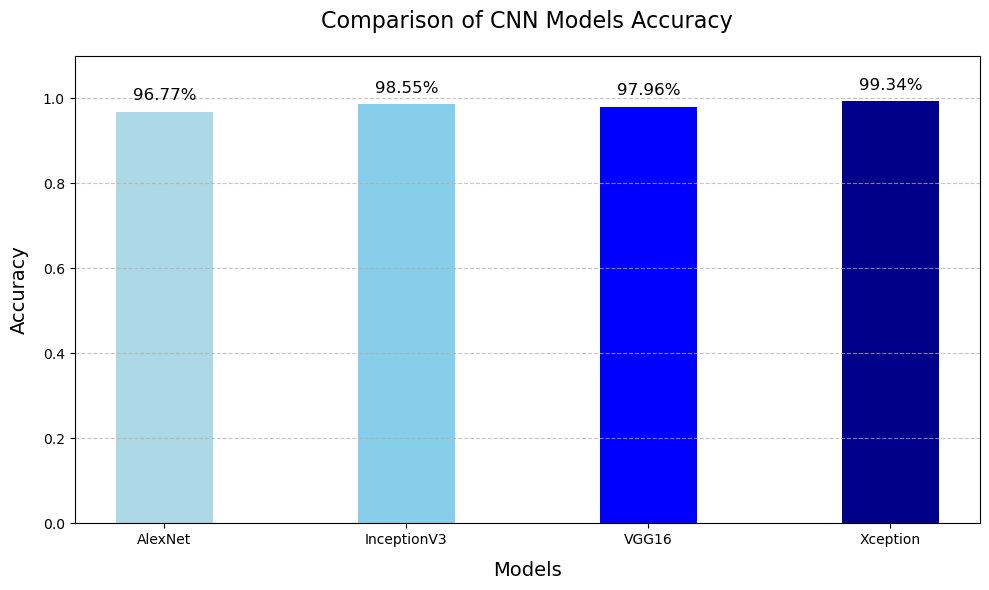

In [45]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load your saved models
model1 = tf.keras.models.load_model('alex.h5')
model2 = tf.keras.models.load_model('inception.h5')
model3 = tf.keras.models.load_model('Vgg16good.h5')
model4 = tf.keras.models.load_model('xception_beast.h5')

# Load your test dataset (replace with your actual dataset)
# Example: (x_test, y_test) should be your test data and labels
# x_test, y_test = load_your_test_data()

# Convert y_test to one-hot encoding (if necessary)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=4)

# Evaluate the models
model1_accuracy = model1.evaluate(x_test, y_test_one_hot, verbose=0)[1]  # [1] for accuracy
model2_accuracy = model2.evaluate(x_test, y_test_one_hot, verbose=0)[1]
model3_accuracy = model3.evaluate(x_test, y_test_one_hot, verbose=0)[1]
model4_accuracy = model4.evaluate(x_test, y_test_one_hot, verbose=0)[1]

# Print the accuracies as percentages
print(f"Model 1 Accuracy: {model1_accuracy * 100:.2f}%")
print(f"Model 2 Accuracy: {model2_accuracy * 100:.2f}%")
print(f"Model 3 Accuracy: {model3_accuracy * 100:.2f}%")
print(f"Model 4 Accuracy: {model4_accuracy * 100:.2f}%")

# Plot the accuracies
models = ['AlexNet', 'InceptionV3', 'VGG16', 'Xception']
accuracies = [model1_accuracy, model2_accuracy, model3_accuracy, model4_accuracy]

# Create a slimmer bar plot
plt.figure(figsize=(10, 6))  # Increase figure size for better visualization
bar_width = 0.4  # Adjust the width of the bars
bars = plt.bar(models, accuracies, width=bar_width, color=['lightblue', 'skyblue', 'blue', 'darkblue'])

# Add title and labels
plt.title('Comparison of CNN Models Accuracy', fontsize=16, pad=20)
plt.xlabel('Models', fontsize=14, labelpad=10)
plt.ylabel('Accuracy', fontsize=14, labelpad=10)
plt.ylim(0, 1.1)  # Set y-axis limit to give space for annotations
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability

# Add accuracy values on top of the bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{acc * 100:.2f}%', 
             ha='center', va='bottom', fontsize=12, color='black')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# stacking

In [19]:
x_val, x_testval, y_val, y_testval = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [23]:
# Print shapes
print(f"x_val shape: {x_val.shape}")
print(f"x_testval shape: {x_testval.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_testval shape: {y_testval.shape}")



x_val shape: (759, 150, 150, 3)
x_testval shape: (760, 150, 150, 3)
y_val shape: (759,)
y_testval shape: (760,)


In [27]:
import numpy as np

# Count the number of samples for each class in y_val
unique_classes, class_counts = np.unique(y_val, return_counts=True)

# Print the number of samples for each class
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: {count} image")

Class 0: 157 image
Class 1: 371 image
Class 2: 95 image
Class 3: 136 image


In [36]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model

# Load your saved models
vgg16 = load_model('Vgg16good.h5')
inception = load_model('inception.h5')
#xception = load_model('xception_beast.h5')

# Load your dataset (replace with your actual data)
# x_train, y_train: Training data
# x_val, y_val: Validation data
# x_test, y_test: Test data

# Generate predictions from each base model on the training data
pred_vgg16_train = vgg16.predict(x_train)  # Shape: (num_samples, num_classes)
pred_inception_train = inception.predict(x_train)  # Shape: (num_samples, num_classes)
#pred_xception_train = xception.predict(x_train)  # Shape: (num_samples, num_classes)

# Generate predictions from each base model on the validation data
pred_vgg16_val = vgg16.predict(x_val)  # Shape: (num_samples, num_classes)
pred_inception_val = inception.predict(x_val)  # Shape: (num_samples, num_classes)
#pred_xception_val = xception.predict(x_val)  # Shape: (num_samples, num_classes)

# Stack predictions into a single feature set for the meta-model
stacked_predictions_train = np.concatenate(
    [pred_vgg16_train, pred_inception_train], axis=1
)  # Shape: (num_samples, num_classes * 3)

stacked_predictions_val = np.concatenate(
    [pred_vgg16_val, pred_inception_val], axis=1
)  # Shape: (num_samples, num_classes * 3)

# Train a meta-model (e.g., Logistic Regression)
meta_model = LogisticRegression()
meta_model.fit(stacked_predictions_train, y_train)

# Make predictions on the validation set
final_predictions_val = meta_model.predict(stacked_predictions_val)

# Evaluate accuracy on the validation set
accuracy = accuracy_score(y_val, final_predictions_val)
print(f"Stacking Model Validation Accuracy: {accuracy * 100:.2f}%")

190/190 ━━━━━━━━━━━━━━━━━━━━ 447s 2s/step
190/190 ━━━━━━━━━━━━━━━━━━━━ 109s 542ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 527ms/step
Stacking Model Validation Accuracy: 98.55%


# Interface graphic

In [39]:
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf

# Charger le modèle
model = tf.keras.models.load_model("xception_beast.h5")

# Définir les classes
classes = ["COVID-19", "Normal", "Pneumonia", "Tuberculosis"]

# Titre de l'application
st.title("Classification Médicale par CNN")
st.write("Cette application utilise un modèle de réseau neuronal convolutif pour analyser les radiographies thoraciques et classer les maladies.")

# Charger une image
uploaded_file = st.file_uploader("Téléchargez une image au format JPG ou PNG :", type=["jpg", "png"])
if uploaded_file is not None:
    # Prévisualiser l'image
    img = Image.open(uploaded_file).resize((150, 150))
    st.image(img, caption="Image chargée", use_column_width=True)
    
    # Prétraiter l'image
    img_array = np.array(img) / 255.0  # Normaliser les pixels
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension batch
    
    # Prédire la classe
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    
    # Afficher les résultats
    st.write(f"*Classe prédite* : {classes[class_idx]}")
    st.write(f"*Probabilités* :")
    for i, prob in enumerate(prediction[0]):
        st.write(f"{classes[i]} : {prob:.2f}")

2025-01-17 12:39:54.764 
  command:

    streamlit run C:\Users\BioHazard\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
